## Data Analysis

In [2]:
# Importing libraries
import pandas as pd 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime as dt
# Importing the dataframes 
credits=pd.read_excel('Credits.xlsx')
clients=pd.read_excel('Clients.xlsx')
schedule=pd.read_excel('Credit Schedule.xlsx')

#### Credit Duration and Client Age Correlation

###### How does the duration of a credit (from the Credits table) correlate with the client’s age ?

In [3]:
# We add the column age to the clients table
clients['AgeYears']=[int(round(((dt.today()-clients.loc[i]['BirthDate']).days)/365,0)) for i in range(len(clients))]
clients.head(3)

,ClientID,FirstName,LastName,BirthDate,Gender,AdressState,AgeYears
0,CLT1,Christopher,Roberts,1998-04-10,M,AZ,27
1,CLT10,Zoe,Brooks,2000-01-05,F,SE,25
2,CLT100,Charles,Harrison,1985-01-04,M,AZ,40


In [4]:
# We merge the credits and clients dataframe to extract the two columns of which we will study the correlation
age_duration=credits[['ClientID','CreditDurationMonths']].merge(clients[['ClientID','AgeYears']],on='ClientID',how='left').drop('ClientID',axis=1).sort_values(
    by='AgeYears',ascending=True
)
age_duration.head(3)

,CreditDurationMonths,AgeYears
80,58,24
143,35,24
79,15,24


<AxesSubplot:xlabel='CreditDurationMonths', ylabel='AgeYears'>

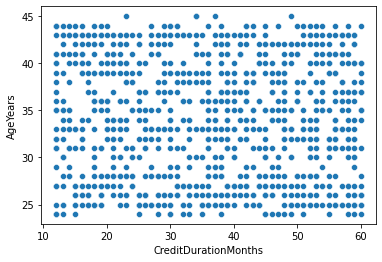

In [5]:
# We plot the graph that displays the relationship between age and duration
sns.scatterplot(data=age_duration[['CreditDurationMonths','AgeYears']],x='CreditDurationMonths',y='AgeYears')
# The data points in the graph below are randomly scattered and do not follow a certain pattern. This is proof that the correlation between age and credit
#duration is weak to none. In other words, the age of the client has a very weak influence on the credit duration

#### Payment Timeliness by Credit Agent:

###### Which agents are associated with more frequent late payments across clients?

In [6]:
# We add 2 columns to the dataframe: the number of total payments made per credit and the number of late payments per credit
schedule_=schedule.drop(['CreditID','CreditDurationMonths','CreditStatus'],axis=1)
def TotalPayment(df):
    totalpayments=[]
    for i in range(len(df)):
        j=0
        while j<len(df.columns) and str(df.iloc[i][j])!='nan':
            j=j+1
        totalpayments.append(j)
    return totalpayments

def LatePayment(df):
    latepayments=[]
    for i in range(len(df)):
        lp=0
        j=0
        while j<len(df.columns) and str(df.iloc[i][j])!='nan':
            if df.iloc[i][j]>0:
                lp=lp+1
            j=j+1
        latepayments.append(lp)
    return latepayments
schedule['LatePayments']=LatePayment(schedule_)
schedule['TotalPayments']=TotalPayment(schedule_)
schedule.head(3)

,CreditID,CreditDurationMonths,CreditStatus,1,2,3,4,5,6,7,...,53,54,55,56,57,58,59,60,LatePayments,TotalPayments
0,1000658,27,Active,-2,-1,3,0,5,1,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,20
1,1000920,13,Active,2,-1,3,-1,-2,4,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,11
2,1000308,57,Active,-1,3,4,-2,2,0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,42


In [7]:
# We merge the credits table with the modified schedule table to compute the number of late payments per credit agent 
credit_creditagent=credits[['CreditID','CreditAgent']].merge(schedule[['CreditID','TotalPayments','LatePayments']],on='CreditID',how='left').drop('CreditID',axis=1)
CreditAgentPerformance=credit_creditagent.groupby('CreditAgent').agg({'TotalPayments':'sum','LatePayments':'sum'}).reset_index().sort_values(by='LatePayments',ascending=False)
CreditAgentPerformance
# From the table below, EMNA.P is the credit agent with the greatest number of late payments. However, this does not allow to see the bigger picture.
#Instead, computing the percentage of late payments (from the total number of payments made) is a more suitable approach

,CreditAgent,TotalPayments,LatePayments
1,EMMA.P,3205,1964
3,JOHN.D,2948,1811
4,LUCY.B,2845,1779
2,JAMES.W,2905,1777
5,MARY.S,2726,1654
0,DAVID.H,2693,1643
9,SARAH.L,2597,1622
6,MICHAEL.T,2455,1509
8,ROBERT.K,2246,1398
7,OLIVIA.M,2224,1373


In [8]:
# We add the percentage of late payments column
CreditAgentPerformance['PercentageLatePayments']=(round((CreditAgentPerformance['LatePayments']/CreditAgentPerformance['TotalPayments'])*100,2))
CreditAgentPerformance.sort_values(by='PercentageLatePayments',ascending=False)
#The table below shows that LUCY.B has the highest percentage of late payments across all credits.

,CreditAgent,TotalPayments,LatePayments,PercentageLatePayments
4,LUCY.B,2845,1779,62.53
9,SARAH.L,2597,1622,62.46
8,ROBERT.K,2246,1398,62.24
7,OLIVIA.M,2224,1373,61.74
6,MICHAEL.T,2455,1509,61.47
3,JOHN.D,2948,1811,61.43
1,EMMA.P,3205,1964,61.28
2,JAMES.W,2905,1777,61.17
0,DAVID.H,2693,1643,61.01
5,MARY.S,2726,1654,60.67


#### Credit Performance by State

######  Are certain regions more likely to have timely payments compared to others?

In [9]:
# We first create a column that displays the number of timely payments
schedule['TimelyPayments']=(schedule['TotalPayments']-schedule['LatePayments'])
schedule.head(3)

,CreditID,CreditDurationMonths,CreditStatus,1,2,3,4,5,6,7,...,54,55,56,57,58,59,60,LatePayments,TotalPayments,TimelyPayments
0,1000658,27,Active,-2,-1,3,0,5,1,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,20,6
1,1000920,13,Active,2,-1,3,-1,-2,4,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,11,6
2,1000308,57,Active,-1,3,4,-2,2,0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,42,17


In [10]:
# We first merge the credits table with the schedule table to get the late payments and total payments by client
credit_schedule=credits[['CreditID','ClientID']].merge(schedule[['CreditID','TotalPayments','TimelyPayments']],on='CreditID',how='left')
credit_schedule.head(3)

,CreditID,ClientID,TotalPayments,TimelyPayments
0,1000001,CLT1,29,10
1,1000002,CLT115,24,9
2,1000003,CLT165,33,10


In [11]:
# Now, we merge the created dataframe with the clients table to ger the client's info (state)
credit_state=credit_schedule.merge(clients[['ClientID','AdressState']],on='ClientID',how='left').drop(['CreditID','ClientID'],axis=1)
state_performance=credit_state.groupby('AdressState').agg({'TotalPayments':'sum','TimelyPayments':'sum'}).reset_index().sort_values(by='TimelyPayments',ascending=False)
state_performance

,AdressState,TotalPayments,TimelyPayments
4,SE,5471,2111
1,AZ,5108,1970
5,TX,4988,1905
3,FL,4323,1652
2,CA,3681,1422
0,AL,3273,1254


In [12]:
# We add a column that computes the percentage of late payments by state
state_performance['PercentageTimelyPayments']=(round((state_performance['TimelyPayments']/state_performance['TotalPayments'])*100,2))
state_performance.sort_values(by='PercentageTimelyPayments',ascending=False)
state_performance
# SEATTLE and ARIZONA are most likely to have timely payments than other states

,AdressState,TotalPayments,TimelyPayments,PercentageTimelyPayments
4,SE,5471,2111,38.59
1,AZ,5108,1970,38.57
5,TX,4988,1905,38.19
3,FL,4323,1652,38.21
2,CA,3681,1422,38.63
0,AL,3273,1254,38.31


<AxesSubplot:xlabel='AdressState', ylabel='PercentageTimelyPayments'>

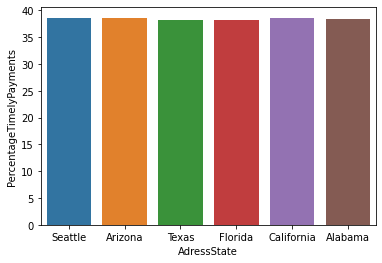

In [13]:
#Plotting the performance by state barplot
state_names={'SE':'Seattle','AZ':'Arizona','TX':'Texas','FL':'Florida','CA':'California','AL':'Alabama'}
state_performance['AdressState']=state_performance['AdressState'].map(state_names)
sns.barplot(data=state_performance[['AdressState','PercentageTimelyPayments']],x='AdressState',y='PercentageTimelyPayments')

#### Gender-Based Credit Analysis

###### Average credit amount by Gender

<AxesSubplot:xlabel='Gender', ylabel='CreditAmount'>

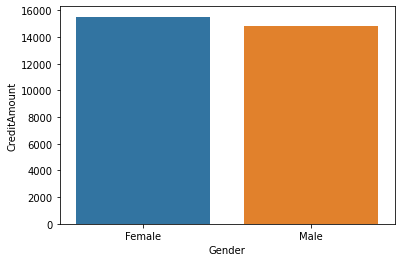

In [14]:
# We merge the credits and clients dataframes to get the gender value
gender_amount=credits[['ClientID','CreditAmount']].merge(clients[['ClientID','Gender']],on='ClientID',how='left').drop('ClientID',axis=1)
gender_amount=gender_amount.groupby('Gender').agg({'CreditAmount':'mean'}).reset_index().sort_values(by='CreditAmount',ascending=False)
genders={'M':'Male','F':'Female'}
gender_amount['Gender']=gender_amount['Gender'].map(genders)
sns.barplot(data=gender_amount,x='Gender',y='CreditAmount')
#The barplot shows that on average, womean borrow higher amounts than men

###### Average credit duration by Gender

<AxesSubplot:xlabel='Gender', ylabel='CreditDurationMonths'>

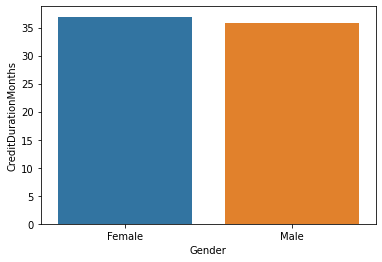

In [15]:
# We merge the credits and clients dataframes to get the gender value
gender_duration=credits[['ClientID','CreditDurationMonths']].merge(clients[['ClientID','Gender']],on='ClientID',how='left').drop('ClientID',axis=1)
gender_duration=gender_duration.groupby('Gender').agg({'CreditDurationMonths':'mean'}).reset_index().sort_values(by='CreditDurationMonths',ascending=False)
genders={'M':'Male','F':'Female'}
gender_duration['Gender']=gender_duration['Gender'].map(genders)
sns.barplot(data=gender_duration,x='Gender',y='CreditDurationMonths')
#The barplot shows that on average, womean tend to have higher credit duration than men